In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import plotly.express as px

In [2]:
df = pd.read_csv('Final-data.csv')

In [3]:
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,10,11,10,0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,15,15,16,0
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,11,12,9,0
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,10,10,10,0


## Derived Feature - Final_Score

In [4]:
weight_g1 = 0.3
weight_g2 = 0.3
weight_g3 = 0.4

In [5]:
df["Final_Score"] = (df['G1'] * weight_g1) + (df['G2'] * weight_g2) + (df['G3'] * weight_g3)
df["Final_Score"] = df["Final_Score"].round()
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject,Final_Score
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,1,1,3,6,5,6,6,1,6.0
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,1,1,3,4,5,5,6,1,5.0
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,2,2,3,3,10,7,8,10,1,8.0
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,1,1,5,2,15,14,15,1,15.0
4,4,GP,F,16,U,GT3,T,3,3,other,...,2,1,2,5,4,6,10,10,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,2,1,2,5,4,10,11,10,0,10.0
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,4,1,1,1,4,15,15,16,0,15.0
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,5,6,11,12,9,0,10.0
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,5,3,4,2,6,10,10,10,0,10.0


In [6]:
df = df.drop(['Unnamed: 0','G1','G2','G3'], axis = 1)

In [7]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,1,6.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,1,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,1,8.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,1,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,0,10.0
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,0,15.0
1041,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,0,10.0
1042,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,0,10.0


In [8]:
temp_df = df.copy()

## Derived Feature - SES_Status

In [9]:
# Function to map socioeconomic status based on features which could affect ses
def get_ses_status_score(row):
    # Calculate the SES score based on relevant features
    ses_score = 0

    # Add points based on parents' education
    if row['Medu'] in ['0', '1']:
        ses_score += 1
    elif row['Medu'] == '2':
        ses_score += 2
    elif row['Medu'] == '3':
        ses_score += 3
    elif row['Medu'] == '4':
        ses_score += 4

    if row['Fedu'] in ['0', '1']:
        ses_score += 1
    elif row['Fedu'] == '2':
        ses_score += 2
    elif row['Fedu'] == '3':
        ses_score += 3
    elif row['Fedu'] == '4':
        ses_score += 4

    # Add points based on parents' occupation (Mother_job and Father_job)
    if row['Mjob'] in ['at_home', 'other']:
        ses_score += 1
    elif row['Mjob'] in ['teacher', 'health', 'services']:
        ses_score += 2

    if row['Fjob'] in ['at_home', 'other']:
        ses_score += 1
    elif row['Fjob'] in ['teacher', 'health', 'services']:
        ses_score += 2

    # Add points based on family size (famsize)
    if row['famsize'] == 'LE3':
        ses_score += 1
        
    # Add points based on address (Urban or Rural)
    if row['address'] == 'U':
        ses_score += 1

    # Add points based on Parents_status (Together or Apart)
    if row['Pstatus'] == 'T':
        ses_score += 1
        
    # Add points based on guardian
    if row['guardian'] in ['mother', 'father']:
        ses_score += 1
    elif row['guardian'] == 'other':
        ses_score += 2

    # Add points based on school_support, fam_support, paid_extra_classes, higher_edu, internet, and nursery
    if row['schoolsup'] == 'yes':
        ses_score += 1

    if row['famsup'] == 'yes':
        ses_score += 1

    if row['paid'] == 'yes':
        ses_score += 1

    if row['higher'] == 'yes':
        ses_score += 1

    if row['internet'] == 'yes':
        ses_score += 1

    if row['nursery'] == 'yes':
        ses_score += 1

    return ses_score

In [10]:
df['ses_score'] = df.apply(get_ses_status_score, axis=1)
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score,ses_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,1,6.0,8
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,1,5.0,8
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,1,8.0,11
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,1,15.0,12
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,1,9.0,9
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,1,15.0,12
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,1,12.0,9
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,1,6.0,9
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,1,18.0,11
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,1,15.0,10


<Axes: ylabel='Density'>

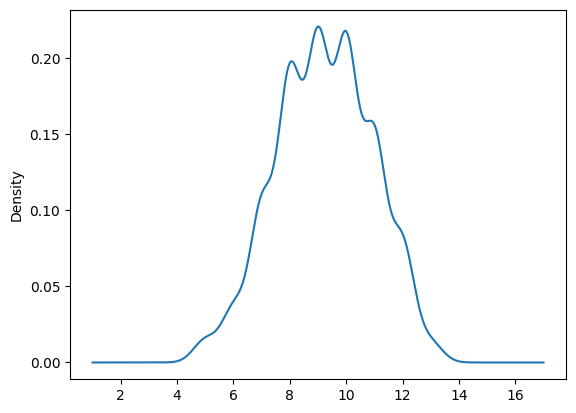

In [11]:
df["ses_score"].plot(kind='kde')

In [12]:
# Calculate quartiles to derive threshold values
q1 = np.percentile(df['ses_score'], 25)
q2 = np.percentile(df['ses_score'], 50)  # Median
q3 = np.percentile(df['ses_score'], 75)

# Print the calculated quartiles
print("1st Quartile (25th percentile):", q1)
print("2nd Quartile (Median, 50th percentile):", q2)
print("3rd Quartile (75th percentile):", q3)

1st Quartile (25th percentile): 8.0
2nd Quartile (Median, 50th percentile): 9.0
3rd Quartile (75th percentile): 10.0


In [14]:
ses_array = []
ses_array = df['ses_score']
ses_array = set(ses_array)
ses_array

{5, 6, 7, 8, 9, 10, 11, 12, 13}

In [15]:
def get_ses_status_category(row):
    # Categorize SES score into 'Low', 'Medium', and 'High'
    if row['ses_score'] <= 8:
        return 'Low'
    elif row['ses_score'] <= 9:
        return 'Medium'
    else:
        return 'High'

In [16]:
df['ses_status'] = df.apply(get_ses_status_category, axis=1)

In [17]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score,ses_score,ses_status
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,1,6.0,8,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,1,5.0,8,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,1,8.0,11,High
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,1,15.0,12,High
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,1,9.0,9,Medium
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,1,15.0,12,High
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,1,12.0,9,Medium
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,1,6.0,9,Medium
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,1,18.0,11,High
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,1,15.0,10,High


In [18]:
#dropping the features used in calculating ses_status
df = df.drop(['address', 'famsize' , 'Pstatus','Medu','Fedu','Mjob','Fjob',
            'guardian','famsup','schoolsup', 'internet','paid','higher','nursery', 'ses_score'], axis = 1)

## Derived Feature - SES_Status method-2

In [19]:
# Function to map socioeconomic status based on features which could affect ses
def get_ses_status_score_2(row):
    # Calculate the SES score based on relevant features
    ses_score = 0

    # Add points based on parents' education
    if row['Medu'] == '2':
        ses_score += 1
    elif row['Medu'] == '3':
        ses_score += 2
    elif row['Medu'] == '4':
        ses_score += 3


    if row['Fedu'] == '2':
        ses_score += 1
    elif row['Fedu'] == '3':
        ses_score += 2
    elif row['Fedu'] == '4':
        ses_score += 3

    # Add points based on parents' occupation (Mother_job and Father_job)
    
    if row['Mjob'] in ['teacher', 'health', 'services']:
        ses_score += 1

    
    if row['Fjob'] in ['teacher', 'health', 'services']:
        ses_score += 1

    # Add points based on family size (famsize)
    if row['famsize'] == 'LE3':
        ses_score += 1
        
    # Add points based on address (Urban or Rural)
    if row['address'] == 'U':
        ses_score += 1

    # Add points based on Parents_status (Together or Apart)
    if row['Pstatus'] == 'T':
        ses_score += 1
        
    # Add points based on guardian
    if row['guardian'] in ['mother', 'father']:
        ses_score += 1
    elif row['guardian'] == 'other':
        ses_score += 2

    # Add points based on school_support, fam_support, paid_extra_classes, higher_edu, internet, and nursery
    if row['schoolsup'] == 'yes':
        ses_score += 1

    if row['famsup'] == 'yes':
        ses_score += 1

    if row['paid'] == 'yes':
        ses_score += 1

    if row['higher'] == 'yes':
        ses_score += 1

    if row['internet'] == 'yes':
        ses_score += 1

    if row['nursery'] == 'yes':
        ses_score += 1

    return ses_score

In [20]:
temp_df['ses_score'] = temp_df.apply(get_ses_status_score_2, axis=1)
temp_df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score,ses_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,1,6.0,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,1,5.0,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,1,8.0,9
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,1,15.0,10
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,1,9.0,7
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,1,15.0,10
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,1,12.0,7
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,1,6.0,7
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,1,18.0,9
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,1,15.0,8


In [23]:
set(temp_df.ses_score.unique())

{3, 4, 5, 6, 7, 8, 9, 10, 11}

<Axes: ylabel='Density'>

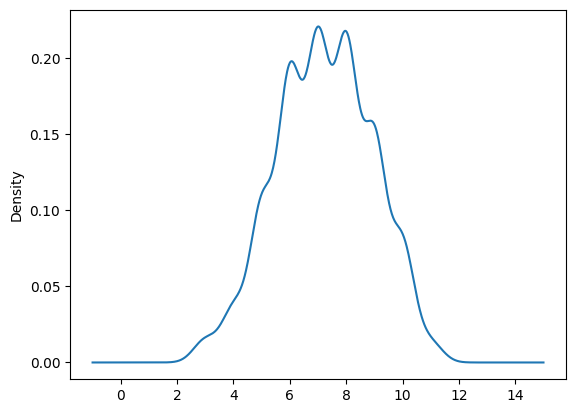

In [24]:
temp_df["ses_score"].plot(kind='kde')
# so we are going to split it into 3,4,5- low ; 6,7,8- medium ; 9,10,11- heigh 

In [25]:
def get_ses_status_category_2(row):
    # Categorize SES score into 'Low', 'Medium', and 'High'
    if row['ses_score'] <= 5:
        return 'Low'
    elif row['ses_score'] <= 8:
        return 'Medium'
    else:
        return 'High'

In [26]:
temp_df['ses_status'] = temp_df.apply(get_ses_status_category_2, axis=1)

In [28]:
temp_df['ses_status'].value_counts()

Medium    632
High      251
Low       161
Name: ses_status, dtype: int64

In [29]:
#dropping the features used in calculating ses_status
temp_df = temp_df.drop(['address', 'famsize' , 'Pstatus','Medu','Fedu','Mjob','Fjob',
            'guardian','famsup','schoolsup', 'internet','paid','higher','nursery', 'ses_score'], axis = 1)

In [31]:
temp_df
# remain with 19 features

,school,sex,age,reason,traveltime,studytime,failures,activities,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score,ses_status
0,GP,F,18,course,2,2,0,no,no,4,3,4,1,1,3,6,1,6.0,Medium
1,GP,F,17,course,1,2,0,no,no,5,3,3,1,1,3,4,1,5.0,Medium
2,GP,F,15,other,1,2,3,no,no,4,3,2,2,3,3,10,1,8.0,High
3,GP,F,15,home,1,3,0,yes,yes,3,2,2,1,1,5,2,1,15.0,High
4,GP,F,16,home,1,2,0,no,no,4,3,2,1,2,5,4,1,9.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,course,1,3,1,yes,no,5,4,2,1,2,5,4,0,10.0,Low
1040,MS,F,18,course,1,2,0,no,no,4,3,4,1,1,1,4,0,15.0,High
1041,MS,F,18,course,2,2,0,yes,no,1,1,1,1,1,5,6,0,10.0,Low
1042,MS,M,17,course,2,1,0,no,no,2,4,5,3,4,2,6,0,10.0,Medium


## Derived Feature 2  - avg_alc

In [32]:
#For alcohol let's consider categories:
#1 : very low
#2 : low
#3 : moderate
#4 : high
#5 : very high
temp_df['avg_alc'] = (temp_df['Dalc'] + temp_df['Walc']) / 2

In [31]:
#dropping the features used in calculating ses_status
temp_df = temp_df.drop(['Dalc', 'Walc'], axis = 1)

### split alc consumption in 3 categories

In [33]:
def get_alc_status_category(row):
    # Categorize alc score into 'Low', 'Moderate', and 'High'
    if row['avg_alc'] <= 2:
        return 'Low'
    elif row['avg_alc'] <= 3.5:
        return 'Moderate'
    else:
        return 'High'

In [34]:
temp_df['alc_status'] = temp_df.apply(get_alc_status_category, axis=1)

In [35]:
temp_df.avg_alc.unique()

array([1. , 2.5, 1.5, 2. , 3. , 5. , 3.5, 4. , 4.5])

In [36]:
temp_df.alc_status.value_counts()

Low         732
Moderate    252
High         60
Name: alc_status, dtype: int64

##### ANOVA test for alc_status vs Final_Score for 3 catogeries

In [37]:
alc_anova_result = f_oneway(
    temp_df[temp_df['alc_status'] == 'Low']['Final_Score'],
    temp_df[temp_df['alc_status'] == 'Moderate']['Final_Score'],
    temp_df[temp_df['alc_status'] == 'High']['Final_Score']
    
)

# Print the ANOVA test result
print("ANOVA test result:")
print("F-statistic:", alc_anova_result.statistic)
print("p-value:", alc_anova_result.pvalue)

ANOVA test result:
F-statistic: 10.238430091360597
p-value: 3.950692716506527e-05


- F stat is high and p value is low which means alc_status is strongly related to final gread

### split alc consumption in 5 categories 

In [38]:
def get_alc_status_category_2(row):
    # Categorize alc score into 'very low', 'low', 'moderate', and 'high' , 'vary high'
    if row['avg_alc'] <= 1:
        return 'very low'
    elif row['avg_alc'] <= 2:
        return 'low'
    elif row['avg_alc'] <= 3:
        return 'moderate'
    elif row['avg_alc'] <= 4:
        return 'high'
    else:
        return 'very high'

In [39]:
temp_df['alc_status_2'] = temp_df.apply(get_alc_status_category_2, axis=1)

In [42]:
temp_df.alc_status_2.value_counts()

very low     391
low          341
moderate     203
high          75
very high     34
Name: alc_status_2, dtype: int64

##### ANOVA test for alc_status vs Final_Score for 5 catogeries

In [43]:
alc2_anova_result = f_oneway(
    temp_df[temp_df['alc_status_2'] == 'very low']['Final_Score'],
    temp_df[temp_df['alc_status_2'] == 'low']['Final_Score'],
    temp_df[temp_df['alc_status_2'] == 'moderate']['Final_Score'],
    temp_df[temp_df['alc_status_2'] == 'high']['Final_Score'],
    temp_df[temp_df['alc_status_2'] == 'very high']['Final_Score']
    
    
)

# Print the ANOVA test result
print("ANOVA test result:")
print("F-statistic:", alc2_anova_result.statistic)
print("p-value:", alc2_anova_result.pvalue)

ANOVA test result:
F-statistic: 5.312597146987013
p-value: 0.00030864763133167276


- F stat is low and p value is high as compaired to previous analysis which means previous method for alc_status is more effective than this

In [44]:
# dropping the alc_status_2 and avg_alc cols 
temp_df = temp_df.drop(['alc_status_2', 'avg_alc'], axis = 1)

In [45]:
temp_df
# 18 features remaining 

,school,sex,age,reason,traveltime,studytime,failures,activities,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score,ses_status,alc_status
0,GP,F,18,course,2,2,0,no,no,4,3,4,1,1,3,6,1,6.0,Medium,Low
1,GP,F,17,course,1,2,0,no,no,5,3,3,1,1,3,4,1,5.0,Medium,Low
2,GP,F,15,other,1,2,3,no,no,4,3,2,2,3,3,10,1,8.0,High,Moderate
3,GP,F,15,home,1,3,0,yes,yes,3,2,2,1,1,5,2,1,15.0,High,Low
4,GP,F,16,home,1,2,0,no,no,4,3,2,1,2,5,4,1,9.0,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,course,1,3,1,yes,no,5,4,2,1,2,5,4,0,10.0,Low,Low
1040,MS,F,18,course,1,2,0,no,no,4,3,4,1,1,1,4,0,15.0,High,Low
1041,MS,F,18,course,2,2,0,yes,no,1,1,1,1,1,5,6,0,10.0,Low,Low
1042,MS,M,17,course,2,1,0,no,no,2,4,5,3,4,2,6,0,10.0,Medium,Moderate


## Performing ANOVA on new features

In [47]:
# Perform the ANOVA test for ses_status vs. Final Score
ses_anova_result = f_oneway(
    temp_df[temp_df['ses_status'] == 'Low']['Final_Score'],
    temp_df[temp_df['ses_status'] == 'Medium']['Final_Score'],
    temp_df[temp_df['ses_status'] == 'High']['Final_Score']
)

In [48]:
# Perform the ANOVA test for go out with friends vs. Final Score
goout_anova_result = f_oneway(
    temp_df[temp_df['goout'] == 1]['Final_Score'],
    temp_df[temp_df['goout'] == 2]['Final_Score'],
    temp_df[temp_df['goout'] == 3]['Final_Score'],
    temp_df[temp_df['goout'] == 4]['Final_Score'],
    temp_df[temp_df['goout'] == 5]['Final_Score']
)

In [49]:
# Perform the ANOVA test for family relationship vs. Final Score
fam_anova_result = f_oneway(
    temp_df[temp_df['famrel'] == 1]['Final_Score'],
    temp_df[temp_df['famrel'] == 2]['Final_Score'],
    temp_df[temp_df['famrel'] == 3]['Final_Score'],
    temp_df[temp_df['famrel'] == 4]['Final_Score'],
    temp_df[temp_df['famrel'] == 5]['Final_Score']
)

In [50]:
# Perform the ANOVA test for Romantic relationship vs. Final Score
rom_anova_result = f_oneway(
    temp_df[temp_df['romantic'] == 'yes']['Final_Score'],
    temp_df[temp_df['romantic'] == 'no']['Final_Score'],
    
)

In [51]:
print("ANOVA test result:")

# Print the ANOVA test result for ses_status vs final score
print("ses_status vs. Final Score:          F-statistic =", ses_anova_result.statistic, " p =", ses_anova_result.pvalue)

# Print the ANOVA test result for go out with friends vs final score
print("go out with friend vs. Final Score:  F-statistic =", goout_anova_result.statistic, " p =", goout_anova_result.pvalue)

# Print the ANOVA test result for family relationship vs final score
print("family relationship vs. Final Score: F-statistic =", fam_anova_result.statistic, "p =", fam_anova_result.pvalue)

# Print the ANOVA test result for relationship vs final score
print("romantic relationship vs. Final Score:F-statistic =", rom_anova_result.statistic, "  p =", rom_anova_result.pvalue)

# Print the ANOVA test result for alcohol con vs final score
print("alcohol con. vs. Final Score:        F-statistic =", alc2_anova_result.statistic, "  p =", alc2_anova_result.pvalue)


ANOVA test result:
ses_status vs. Final Score:          F-statistic = 13.86743662008653  p = 1.1383601717065608e-06
go out with friend vs. Final Score:  F-statistic = 8.273167699778869  p = 1.4369456295221047e-06
family relationship vs. Final Score: F-statistic = 1.7828736587307605 p = 0.1299868897439774
romantic relationship vs. Final Score:F-statistic = 8.84918127133717   p = 0.002999795908015832
alcohol con. vs. Final Score:        F-statistic = 5.312597146987013   p = 0.00030864763133167276


#### ses_status vs. Final Score:

- F- statistic = 13.86743662008653
- p-value (p)  = 1.1383601717065608e-06
- Analysis: The p-value (0.00000113) is way smaller than 0.05, which indicates a statistically strong significant association between 'ses_Stetus' and the 'Final Score'. However, since the p-value is close to zero, and F-stat is very high it indicates a strong statistical association, implying that 'ses_status' is a relevant factor in predicting the 'Final Score'.

#### go out with friends vs. Final Score:

- F- statistic = 8.273167699778869
- p-value (p)  = 1.4369456295221047e-06
- Analysis: The p-value (0.00000143) is way smaller than 0.05, which indicates a statistically strong significant association between 'go out' and the 'Final Score'. However, since the p-value is close to zero, and F-stat is  high it indicates a strong statistical association, implying that 'go out' is a relevant factor in predicting the 'Final Score'.

#### family relationship vs. Final Score:

- F- statistic = 1.7828736587307605
- p-value (p)  = 0.1299868897439774
- Analysis: The p-value (0.129) is higher than 0.05, which means there is no statistically significant association between 'family_relationships' and the 'Final Score'. The two variables are likely to be independent of each other.

#### romantic relationship vs. Final Score:

- F- statistic = 8.84918127133717
- p-value (p)  = 0.0029997959080
- Analysis: The p-value (0.002999) is smaller than 0.05, which indicates a statistically strong significant association between 'romantic relationship' and the 'Final Score'. However, since the p-value is small, and F-stat is  high it indicates a strong statistical association, implying that 'romantic relationship' is a relevant factor in predicting the 'Final Score'.

#### alcohol con. vs. Final Score:

- F- statistic = 5.312597146987013
- p-value (p)  = 0.00030864763133
- Analysis: The p-value (0.0003) is smaller than 0.05, which indicates a statistically strong significant association between 'alcohol con.' and the 'Final Score'. However, since the p-value is small, and F-stat is  high it indicates a strong statistical association, implying that 'alcohol con.' is a relevant factor in predicting the 'Final Score'.

<Axes: ylabel='Density'>

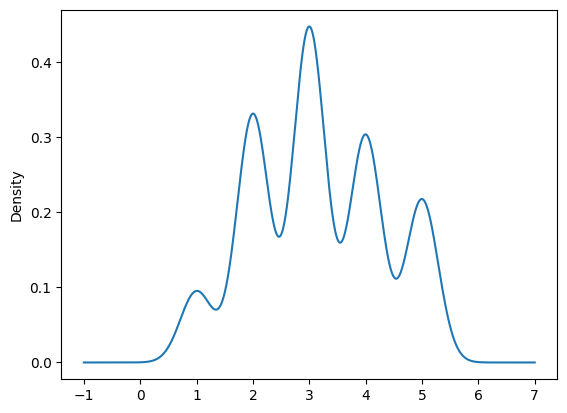

In [55]:
temp_df["goout"].plot(kind='kde')

<Axes: ylabel='Density'>

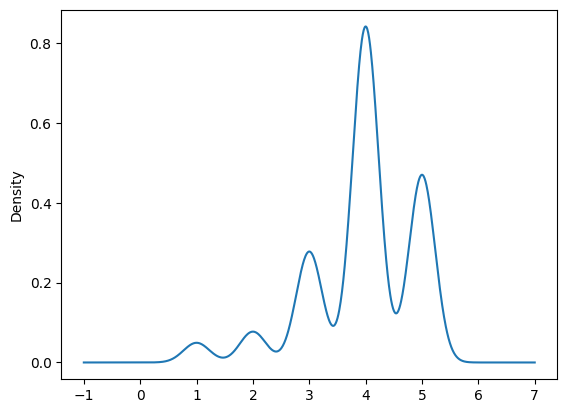

In [49]:
temp_df["famrel"].plot(kind='kde')

<Axes: ylabel='Density'>

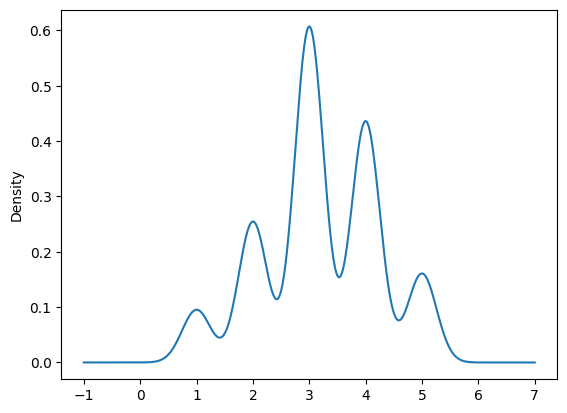

In [53]:
temp_df["freetime"].plot(kind='kde')

## Rahul Derived Feature - avg_alc

In [18]:
#For alcohol let's consider categories:
#1 : very low
#2 : low
#3 : moderate
#4 : high
#5 : very high
df['avg_alc'] = (df['Dalc'] + df['Walc']) / 2

In [19]:
df.head(5)

,school,sex,age,reason,traveltime,studytime,failures,activities,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Subject,Final_Score,ses_status,avg_alc
0,GP,F,18,course,2,2,0,no,no,4,3,4,1,1,3,6,1,6.0,Low,1.0
1,GP,F,17,course,1,2,0,no,no,5,3,3,1,1,3,4,1,5.0,Low,1.0
2,GP,F,15,other,1,2,3,no,no,4,3,2,2,3,3,10,1,8.0,High,2.5
3,GP,F,15,home,1,3,0,yes,yes,3,2,2,1,1,5,2,1,15.0,High,1.0
4,GP,F,16,home,1,2,0,no,no,4,3,2,1,2,5,4,1,9.0,Medium,1.5


In [20]:
#dropping the features used in calculating ses_status
df = df.drop(['Dalc', 'Walc'], axis = 1)

### Derived Feature - Social_Score

In [21]:
label = {'no': 0, 'yes': 1}
df['romantic'] = df['romantic'].map(label)

In [22]:
# Create a contingency table for Going Out with Friends vs. Final Score
friends_contingency = pd.crosstab(df['goout'], df['Final_Score'])

# Perform the chi-square test for Going Out with Friends vs. Final Score
chi2_friends, p_friends, _, _ = chi2_contingency(friends_contingency)

# Create a contingency table for Family Relationships vs Final Score
family_contingency = pd.crosstab(df['famrel'], df['Final_Score'])

# Perform the chi-square test for Family Relationships vs Final Score
chi2_family, p_family, _, _ = chi2_contingency(family_contingency)

# Create a contingency table for Romantic Relationship vs Final Score
romantic_contingency = pd.crosstab(df['romantic'], df['Final_Score'])

# Perform the chi-square test for Romantic Relationship vs Final Score
chi2_romantic, p_romantic, _, _ = chi2_contingency(romantic_contingency)

In [23]:
# Print the chi-square test results for each combination of categorical features
print("Chi-Square Test Results:")
print("Going Out with Friends vs. Final Score: chi2 =", chi2_friends, "p =", p_friends)
print("Family Relationships vs Final Score =", chi2_family, "p =", p_family)
print("Romantic Relationship vs Final Score: chi2 =", chi2_romantic, "p =", p_romantic)

Chi-Square Test Results:
Going Out with Friends vs. Final Score: chi2 = 114.37133214263348 p = 0.001100289731705088
Family Relationships vs Final Score = 88.17613219806589 p = 0.09456737528238109
Romantic Relationship vs Final Score: chi2 = 27.13058437009858 p = 0.0765785909286239


#### Going Out with Friends vs. Final Score:

#### Chi-square statistic (chi2) = 114.3713
#### p-value (p) = 0.0011
#### Analysis: The p-value (0.0011) is smaller than 0.05, which indicates a statistically significant association between 'going_out_with_friends' and the 'Final Score'. This suggests that 'going_out_with_friends' might have some impact on the 'Final Score'. However, since the p-value is close to zero, it indicates a strong statistical association, implying that 'going_out_with_friends' could be a relevant factor in predicting the 'Final Score'.

#### Family Relationships vs. Final Score:

#### Chi-square statistic (chi2) = 88.1761
#### p-value (p) = 0.0946
#### Analysis: The p-value (0.0946) is greater than 0.05, which means there is no statistically significant association between 'family_relationships' and the 'Final Score'. The two variables are likely to be independent of each other.

#### Romantic Relationship vs. Final Score:

#### Chi-square statistic (chi2) = 27.1306
#### p-value (p) = 0.0766
#### Analysis: The p-value (0.0766) is greater than 0.05, indicating no statistically significant association between 'romantic_relationship' and the 'Final Score'. The two variables are likely to be independent of each other.

In [24]:
def calculate_social_score(row):
    family_weight = 0.15
    friends_weight = 0.7
    romantic_weight = 0.15

    # Calculate the social score using weighted average
    social_score = (row['famrel'] * family_weight +
                    row['goout'] * friends_weight +
                    row['romantic'] * romantic_weight)

    # Round the social_score to the nearest integer and return it
    return int(round(social_score))

In [25]:
# Apply the function to create the 'social_score' feature in the DataFrame
df['social_score'] = df.apply(calculate_social_score, axis=1)

In [26]:
# Define the categories for 'social_score'
df['social_score_category'] = pd.cut(df['social_score'], bins=[0, 2, 3, 5], labels=['Very Bad', 'Neutral', 'Excellent'])

In [27]:
df = df.drop(['famrel', 'romantic', 'goout', 'social_score'], axis = 1)

In [28]:
df

,school,sex,age,reason,traveltime,studytime,failures,activities,freetime,health,absences,Subject,Final_Score,ses_status,avg_alc,social_score_category
0,GP,F,18,course,2,2,0,no,3,3,6,1,6.0,Low,1.0,Neutral
1,GP,F,17,course,1,2,0,no,3,3,4,1,5.0,Low,1.0,Neutral
2,GP,F,15,other,1,2,3,no,3,3,10,1,8.0,High,2.5,Very Bad
3,GP,F,15,home,1,3,0,yes,2,5,2,1,15.0,High,1.0,Very Bad
4,GP,F,16,home,1,2,0,no,3,5,4,1,9.0,Medium,1.5,Very Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,course,1,3,1,yes,4,5,4,0,10.0,Low,1.5,Very Bad
1040,MS,F,18,course,1,2,0,no,3,1,4,0,15.0,High,1.0,Neutral
1041,MS,F,18,course,2,2,0,yes,1,5,6,0,10.0,Low,1.0,Very Bad
1042,MS,M,17,course,2,1,0,no,4,2,6,0,10.0,High,3.5,Excellent
